<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/%E9%9B%BB%E7%A3%81%E5%AD%B8/%E5%B9%B3%E9%9D%A2%E5%B8%B6%E9%9B%BB%E9%AB%94%E7%9A%84%E9%9B%BB%E5%A0%B4%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

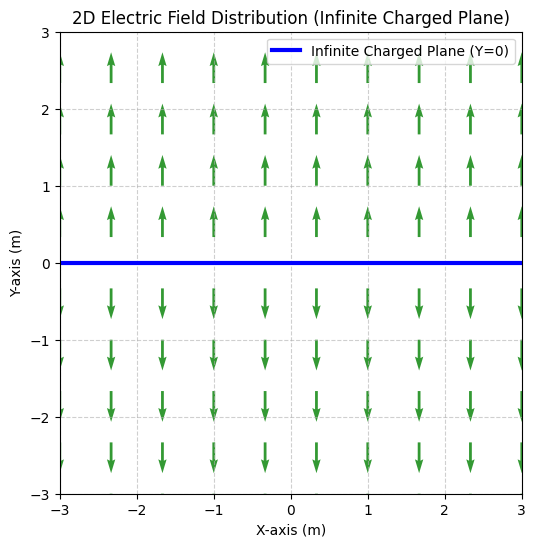

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 定義常數與公式 ---
# 簡化常數 E_mag = sigma / (2 * epsilon0)
E_mag = 1.0  # 簡化電場大小為 1.0 N/C (均勻電場)

def E_field_plane(x, y):
    """計算點 (x, y) 處的電場向量 (Ex, Ey)"""
    Ex = 0

    # 判斷點的 Y 座標
    if y > 0:
        # 上方區域：電場向上 (+Y 方向)
        Ey = E_mag
    elif y < 0:
        # 下方區域：電場向下 (-Y 方向)
        Ey = -E_mag
    else:
        # 在平面上 (y=0)，電場為 0
        Ey = 0

    return Ex, Ey

# --- 2. 設定 2D 網格點 (Quiver Plot) ---
L_x = 3.0  # X 軸空間範圍 (-L_x 到 +L_x)
L_y = 3.0  # Y 軸空間範圍 (-L_y 到 +L_y)
N = 10     # 每軸的取樣點數

X = np.linspace(-L_x, L_x, N)
Y = np.linspace(-L_y, L_y, N)

# 創建 2D 網格
X, Y = np.meshgrid(X, Y)

# --- 3. 計算每個網格點上的電場向量 ---
U, V = np.zeros_like(X), np.zeros_like(Y)
for i in range(N):
    for j in range(N):
        U[i, j], V[i, j] = E_field_plane(X[i, j], Y[i, j])

# --- 4. 繪製 2D 向量場 ---
plt.figure(figsize=(8, 6))

# 繪製箭頭 (Quiver)
plt.quiver(X, Y, U, V, scale=15, color='green', alpha=0.8)

# 標記無限大平面 (位於 Y=0 處)
plt.axhline(0, color='blue', linestyle='-', linewidth=3, label='Infinite Charged Plane (Y=0)')

# 設定圖表細節
plt.title('2D Electric Field Distribution (Infinite Charged Plane)')
plt.xlabel('X-axis (m)')
plt.ylabel('Y-axis (m)')
plt.xlim([-L_x, L_x])
plt.ylim([-L_y, L_y])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()